In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education = pd.read_sql_query('select * from useducation',con=engine)


engine.dispose()

In [3]:
List_Value = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]
## interpolatipn
states = education["STATE"].unique()

for state in states:
    education.loc[education["STATE"] == state, List_Value] = education.loc[education["STATE"] == state, List_Value].interpolate()

#dropping null values
education.dropna(inplace=True)

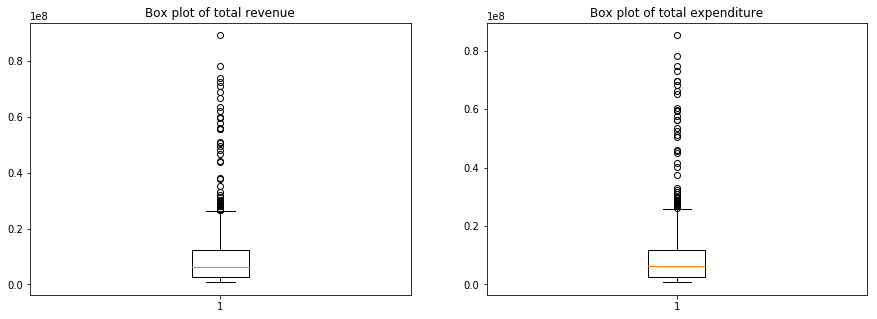

In [4]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education["TOTAL_REVENUE"])
plt.title("Box plot of total revenue")

plt.subplot(1,2,2)
plt.boxplot(education["TOTAL_EXPENDITURE"])
plt.title("Box plot of total expenditure")
plt.show()

Both the values have outliers

In [5]:
## 2) windorized and then plot to eliminate outliers 

from scipy.stats.mstats import winsorize

winsorized_revenue = winsorize(education["TOTAL_REVENUE"], (0, 0.05))

winsorized_expenditure = winsorize(education["TOTAL_EXPENDITURE"], (0, 0.05))

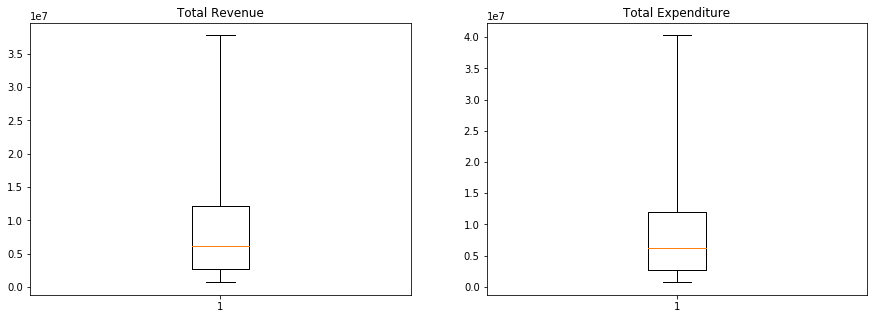

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis = 5)
plt.title("Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis = 5)
plt.title("Total Expenditure")


plt.show()



In [7]:
##3 Create another varable = total revenue - total expenditure

budget_deficit = education.TOTAL_REVENUE - education.TOTAL_EXPENDITURE

Text(0.5, 1.0, 'Budget Deficit')

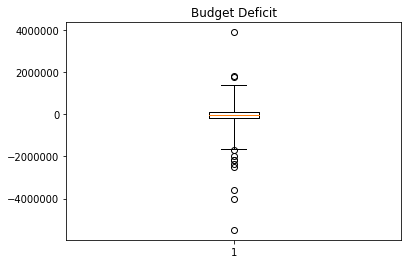

In [8]:
##graph to find outliers

plt.boxplot(budget_deficit, whis = 5)
plt.title("Budget Deficit")


In [9]:
winsorize_deficit = winsorize(budget_deficit, (0.05, 0.05))

Text(0.5, 1.0, 'Budget Deficit')

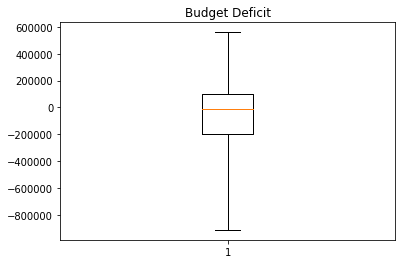

In [10]:
plt.boxplot(winsorize_deficit, whis = 5)
plt.title("Budget Deficit")

In [11]:
##4 Create another Variable = winsorize expenditure - winsorize revenue

deficit2 = winsorized_expenditure - winsorized_revenue

Text(0.5, 1.0, 'Box plot of budget deficit 2')

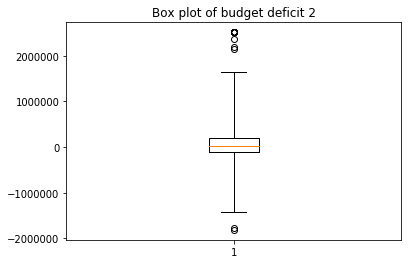

In [12]:
plt.boxplot(deficit2, whis = 5)
plt.title("Box plot of budget deficit 2")

In [13]:
winsorize_deficit2 = winsorize(deficit2, (0.05,0.05))

Text(0.5, 1.0, 'Deficit')

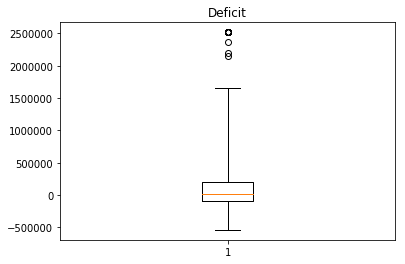

In [14]:
plt.boxplot(winsorize_deficit2, whis = 5)
plt.title("Deficit")

In [15]:
## 5 Compare

pd.DataFrame({"Original Budget":budget_deficit, "Windsorice Budget": winsorize_deficit, "Windsorize Budget 2": winsorize_deficit2 }).describe()

,Original Budget,Windsorice Budget,Windsorize Budget 2
count,4.660000e+02,466.000000,4.660000e+02
mean,-8.094882e+04,-58733.012876,1.720532e+05
std,6.144222e+05,341300.816505,6.509561e+05
min,-5.487742e+06,-913765.000000,-5.400550e+05
25%,-1.965748e+05,-196574.750000,-9.826300e+04
50%,-8.872500e+03,-8872.500000,1.282350e+04
75%,1.013948e+05,101394.750000,2.047750e+05
max,3.897129e+06,560511.000000,2.518429e+06


The mean and the meadian both change negative to positive and taking out outliers does affect the statistical variabes.

## 6 which method works the best for this variable
The method in question three seems the most reasonable going from the original data and then using the outlier elimination process.